# 1-Loading libraries

In [1]:
#Libraries

# Data manipulation
import pandas as pd
import numpy as np
import os
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# For Missing Values
from sklearn.impute import SimpleImputer

# Processsing

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import time
start_time = time.time()


# 2-Data visualisation --> https://public.tableau.com/profile/jc22592658#!/vizhome/EDA_16020922696910/Age_comparison

I have decided to use tableau as an interative tool so you can play with data

## 2.1-Market trend

- Market trend has been positive until 2019 , meaning that on average prices dropped. Nevetheless , on 2020 it went back to common trend.
- From 2017 the most valuable player (Neymar) has reduced his value from 123 M to 105,5M.
- 75% of football players value is less than 5M , 20 % from 5 M to 20 M and the remaining 7% more than 20 M
- Forwards are more valuable with an average value of 4 M € , followed by midfields , goalkeepers and defenders
- As a matter of fact , the model will train with more football players that are valued less than 20 M


## 2.2-Age analysis

- Most of the players in the dataset are between 17-32 years old
- On average the players reach their best value between 25-30 years old
- The most valued football players are between 25-32 years old
- There is a football player in 2020 whose value is 93,5 M being 20 years old K.Mbappé

## 2.3-Conclusion
- On average most of the football players reach their value potential between 23 to 30 years old
- Our challenge is to understand why they value that much and how we can detect those parameters in football players under 22.
- Mbappé can be a good example

# 3-Data Wrangling

'The raw data shape is :'

(100817, 108)

'The selection shape to apply our model is :'

(100817, 108)

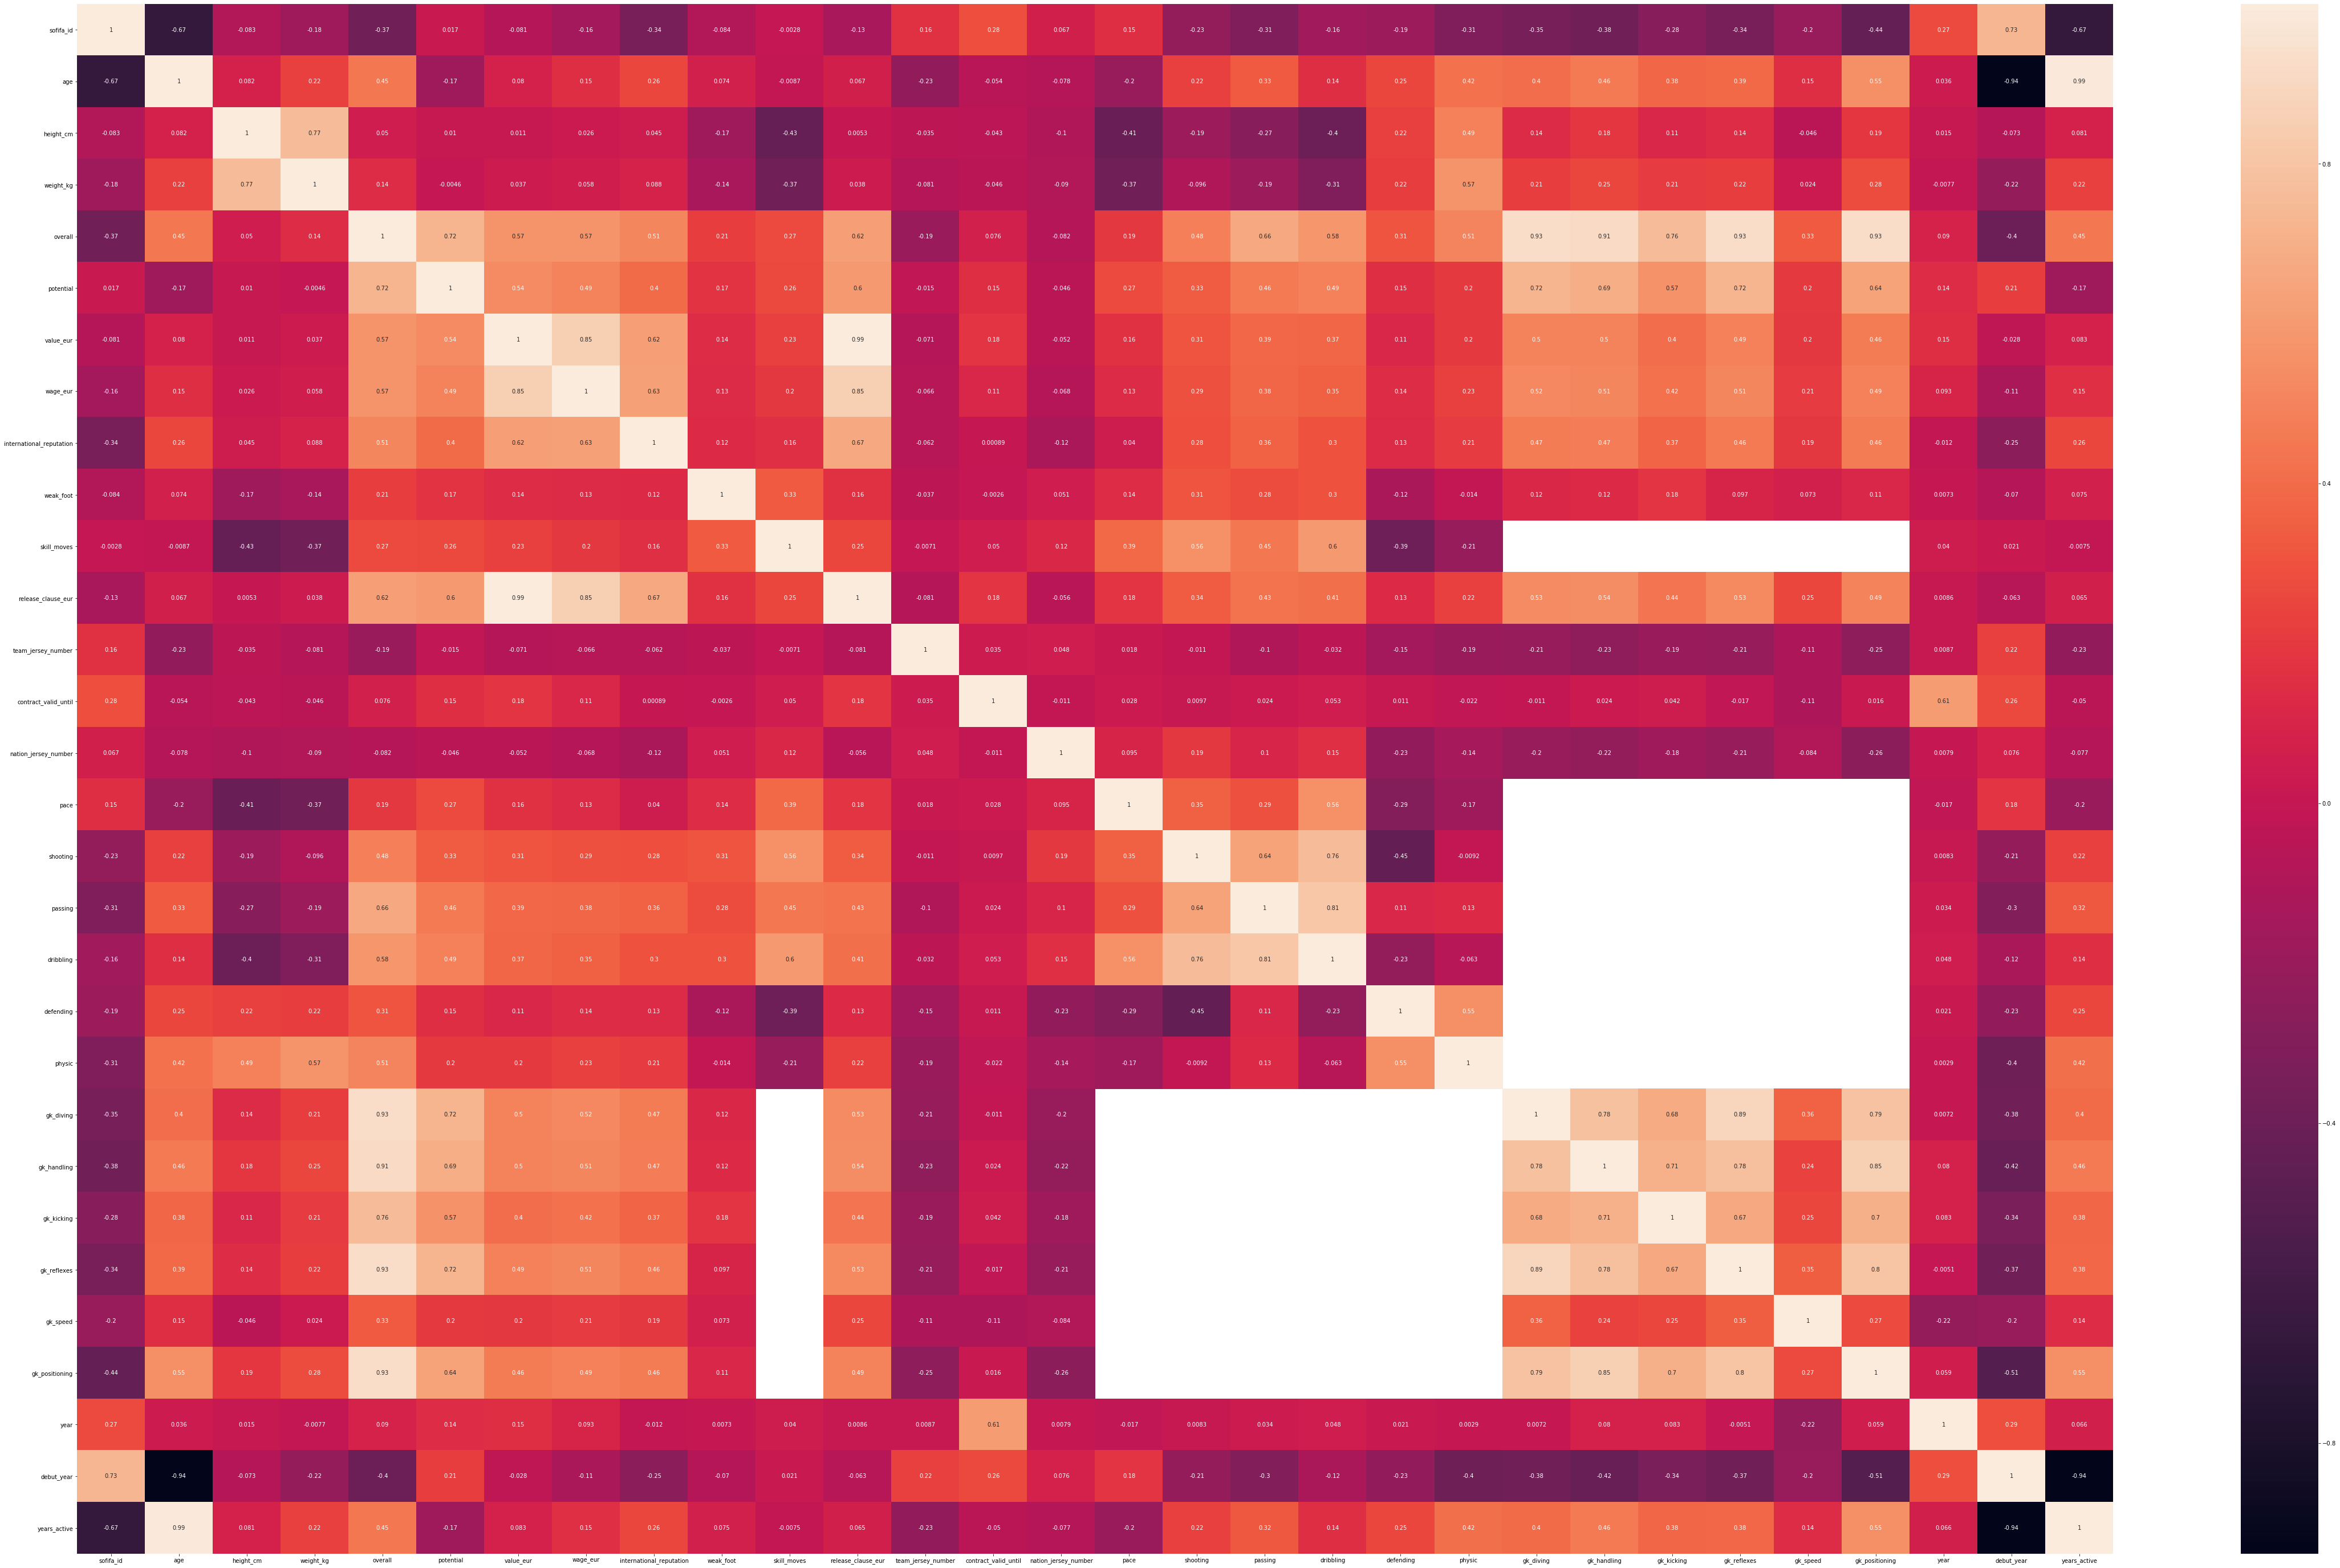

In [2]:
#Loading dataframes and unifying

data_2015 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_15.csv")
data_2016 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_16.csv")
data_2017 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_17.csv")
data_2018 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_18.csv")
data_2019 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_18.csv")
data_2020 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_20.csv")



#adding the column year

dataset = [data_2015,data_2016,data_2017,data_2018,data_2019,data_2020]
name_dataset = ['data_2015','data_2016','data_2017','data_2018','data_2019','data_2020']


def create_year(data,name):
    h = int(name[-4:])
    data['year']= h    
    return data


for i in range(len(dataset)):
    create_year(dataset[i],name_dataset[i])



#adding input year

def create_year(data,name):
    
    h = int(name[-4:])
    data['year']= h
        
    return data


for i in range(len(dataset)):
    create_year(dataset[i],name_dataset[i])


#adding debut year assuming that on average everyone becomes professional at 18

def create_year_debut(data,name):
    h = (pd.DatetimeIndex(data['dob']).year) + 18
    data['debut_year']= h
        
    return data

for i in range(len(dataset)):
    create_year_debut(dataset[i],name_dataset[i])




#adding years active

def create_year_active(data,name):
    h = data['year'] -   data['debut_year'] 
    data['years_active']= h
        
    return data

for i in range(len(dataset)):
    create_year_active(dataset[i],name_dataset[i])




#concatenating all datasets
raw_data = pd.concat([data_2015,data_2016,data_2017,data_2018,data_2019,data_2020] , ignore_index= True)


#understanding positions
def label_pos (raw_data):
    if(raw_data.team_position == "RB" or raw_data.team_position == "CB" or raw_data.team_position == "LB" or 
       raw_data.team_position == "LWB" or raw_data.team_position == "RCB"or raw_data.team_position == "RWB" or 
       raw_data.team_position == "LCB"):
        return 'Defender'
    if(raw_data.team_position == "RW" or raw_data.team_position == "CF" or raw_data.team_position == "LW" or 
       raw_data.team_position == "ST" or raw_data.team_position == "RS"or raw_data.team_position == "LS"
       or raw_data.team_position == "LF"or raw_data.team_position == "RF"):
        return 'Forward'
    if(raw_data.team_position == "RM" or raw_data.team_position == "CM" or raw_data.team_position == "LM"
       or raw_data.team_position == "CAM" or raw_data.team_position == "LDM" or raw_data.team_position == "RDM"
      or raw_data.team_position == "LAM"or raw_data.team_position == "RAM" or raw_data.team_position == "CDM"
       or raw_data.team_position == "RCM"or raw_data.team_position == "LCM"):
        return 'MidFielder'
    if (raw_data.team_position == "SUB"):
        return 'Substitute'
    if (raw_data.team_position == "RES"):
        return 'Reserve'
    if (raw_data.team_position == "GK"):
        return 'Goalkeeper'
    return "other"

raw_data['field_position'] = raw_data.apply (lambda raw_data: label_pos(raw_data), axis=1)
display(f'The raw data shape is :',raw_data.shape)


#Understanding correlation

plt.figure(figsize=(80, 50))
sns_plot = sns.heatmap ( raw_data.corr(), annot = True )


#selecting parameters for the app
selection = raw_data.select_dtypes(exclude =['object'] )



# Filling na

selection = selection.fillna( value = selection.mean()) #filling na with the mean
selection = selection.fillna( value = 0) #if the mean still nan, I fill it with 0
selection = selection[selection.value_eur != 0] #if the column value eur is still 0€ , we drop it.

display(f'The selection shape to apply our model is :',raw_data.shape)


## First assumptions

The following variables have a positive correlation compared to price:
- Release clause
- International reputation
- Overall
- Wage
- Potential

Release clause has a 0,99 coeficiente and can affect negatively to our model. I will take it out of the training / test.

In [3]:
#saving the file
mainpath = "/home/jc/Escritorio/Proyectos_finales_ironhack/Final_project/Predicting_FIFA_players_value"
filename ="raw_data."
fullpath = os.path.join(mainpath, filename)
raw_data.to_csv(fullpath+"csv", index=False)

# 4-Random Forest Regressor

Train shape X : (66056, 9)
Train shape y : (66056,)
Test shape X : (18028, 9)
Test shape y : (18028,)


,Coeff
dribbling,0.421798
defending,0.170973
shooting,0.147851
passing,0.069686
debut_year,0.063221
nation_jersey_number,0.035865
height_cm,0.032936
weight_kg,0.032554
age,0.025115


The r2 is: 84.47 %
Media de la diferencia entre predicción y valor real:-57.12158993227795
--- 71.21141457557678 seconds ---


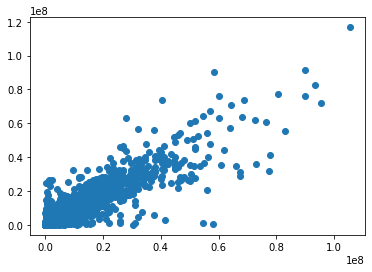

In [4]:
#selecting training dataset

selection_train =  selection[selection.year != 2020]
a = selection_train.columns.values.tolist()


#for loop to eliminate those parameters that we want out of the model

item_list = a

# b = columns that we do not want in the model

b=['release_clause_eur','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','value_eur','sofifa_id','contract_valid_until', 'overall','wage_eur', 'potential','international_reputation','skill_moves','year','skill_moves','physic','pace','years_active','weak_foot','team_jersey_number']

new_list = []
for e in item_list:
    if e not in (b):
        new_list.append(e)
a = new_list




# definitive training sets

X_train = selection_train[a]
print(f'Train shape X : {X_train.shape}' )
y_train = selection_train['value_eur']
print(f'Train shape y : {y_train.shape}')


#selecting test set

selection_test =  selection[selection.year == 2020]
X_test = selection_test[a]
y_test = selection_test['value_eur']

print(f'Test shape X : {X_test.shape}' )
print(f'Test shape y : {y_test.shape}' )


#Applying best model

forest_reg = RandomForestRegressor(n_estimators=50, random_state=42)
forest_reg.fit(X_train, y_train)
forest_reg.feature_importances_


#creating a dataframe with coeficients
display(pd.DataFrame(forest_reg.feature_importances_ , X_train.columns , columns = ['Coeff']).sort_values( by = ['Coeff'] , ascending = False).head(30))
prediction_randomforest = forest_reg.predict(X_test)


#print errors

forest_mse = mean_squared_error(y_test, prediction_randomforest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


#scoring

score = r2_score(y_test, prediction_randomforest)  
print('The r2 is:',format(score*100,'.2f'),'%')


#ploting

random_forest_scatter = plt.scatter (y_test , prediction_randomforest)


# Prediction dataset summary

d = {'y_test' : y_test , 'predictions': prediction_randomforest}
df = pd.DataFrame(d)
df['difference'] = ((y_test - prediction_randomforest) / y_test) * 100
a = df['difference'].mean()
df.reset_index(inplace = True) #quitar el antiguo
print(f'Media de la diferencia entre predicción y valor real:{a}')
df.head()
print("--- %s seconds ---" % (time.time() - start_time))

In [5]:
X_train.head()

,age,height_cm,weight_kg,nation_jersey_number,shooting,passing,dribbling,defending,debut_year
15465,28,170,72,10.000000,88.000000,86.000000,95.000000,24.000000,2005
15466,30,185,80,7.000000,93.000000,80.000000,91.000000,33.000000,2003
15467,31,180,80,11.000000,86.000000,82.000000,92.000000,32.000000,2002
15468,29,193,92,1.000000,52.253949,56.871585,61.917345,50.807406,2004
15469,28,182,85,12.059056,88.000000,79.000000,87.000000,42.000000,2005


In [6]:
raw_data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,rwb,lb,lcb,cb,rcb,rb,year,debut_year,years_active,field_position
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,54+3,45+3,45+3,45+3,54+3,2015,2005,10,Forward
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,57+3,52+3,52+3,52+3,57+3,2015,2003,12,Forward
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,55+3,46+3,46+3,46+3,55+3,2015,2002,13,Substitute
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,56+3,55+3,55+3,55+3,56+3,2015,1999,16,Forward
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,2004,11,Goalkeeper


In [7]:
#Mbappé as an example

Mbappe = raw_data[raw_data['value_eur']  ==  93500000]
display(Mbappe)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,rwb,lb,lcb,cb,rcb,rb,year,debut_year,years_active,field_position
82549,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé,20,1998-12-20,178,73,France,Paris Saint-Germain,...,66+3,63+3,54+3,54+3,54+3,63+3,2020,2016,4,Forward


In [8]:
pd.set_option('display.max_columns',None)
Mbappe = Mbappe.select_dtypes(exclude =['object'] )
print(f'This dataframe can help you to use the app:')
display(Mbappe)

This dataframe can help you to use the app:


,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,year,debut_year,years_active
82549,231747,20,178,73,89,95,93500000,155000,3,4,5,191700000.0,7.0,2022.0,10.0,96.0,84.0,78.0,90.0,39.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,2020,2016,4


# 5- Desktop app

In [9]:
#Interface

import datetime
try:
    # for Python2
    from Tkinter import *   ## notice capitalized T in Tkinter
except ImportError:
    # for Python3
    from tkinter import *   ## notice lowercase 't' in tkinter here
Current_Date = datetime.datetime.today() 
Current_Date= str(Current_Date)

a = X_train.columns.values.tolist()
root=Tk()

root.title("Fifa tool prediction")
entries = []
cont=0

#label3 = Label(root, text= display(X_train.describe())).grid(raw_data = 7 , column = 100 )
for y in (a):
       
    my_label = Label(root, text = a[cont] )
    my_label.grid(row = cont ,column= 4 , pady=5 )
    my_label.config(font=("Arial", 10))
    cont = cont +1

for i in range(len(a)):
    en = Entry(root)
    en.grid(row=i, column=0)
    entries.append(en)
    i = i +1

def execute():
    lista= []
    for entry in entries:
        #print(entry.get())
        lista.append(entry.get())
    #print(lista)
    df = pd.DataFrame(columns=a )
    df.loc[0] = lista
    display(df)
    print(type(df))
    prediction_randomforest = forest_reg.predict(df)
    prediction_randomforest = int(prediction_randomforest)
    display(prediction_randomforest)
    print(type(prediction_randomforest))
    
    label = Label(root, text= f'Hola, su programa ha sido ejecutado con éxito en el dia {Current_Date}').grid(row = 5 , column = 1500 )
    #label.config(font=("Arial", 12))
    label2 = Label(root, text= f'El valor de este jugador es:  {prediction_randomforest /1000000} M €').grid(row = 7 , column = 1500 )
    
    

button=Button(root,text="Execute model",command=execute).grid(row = 10 , column = 1000 )

root.mainloop()

print("--- %s seconds ---" % (time.time() - start_time))


,age,height_cm,weight_kg,nation_jersey_number,shooting,passing,dribbling,defending,debut_year
0,19,178,80,70,84,78,90,93,2016


<class 'pandas.core.frame.DataFrame'>


59850000

<class 'int'>


,age,height_cm,weight_kg,nation_jersey_number,shooting,passing,dribbling,defending,debut_year
0,19,178,80,10,84,78,90,93,2016


<class 'pandas.core.frame.DataFrame'>


85120000

<class 'int'>


,age,height_cm,weight_kg,nation_jersey_number,shooting,passing,dribbling,defending,debut_year
0,19,178,80,55,84,78,90,93,2016


<class 'pandas.core.frame.DataFrame'>


59850000

<class 'int'>


,age,height_cm,weight_kg,nation_jersey_number,shooting,passing,dribbling,defending,debut_year
0,19,178,80,7,84,78,90,93,2016


<class 'pandas.core.frame.DataFrame'>


83300000

<class 'int'>


,age,height_cm,weight_kg,nation_jersey_number,shooting,passing,dribbling,defending,debut_year
0,19,178,80,10,84,78,90,93,2016


<class 'pandas.core.frame.DataFrame'>


85120000

<class 'int'>


,age,height_cm,weight_kg,nation_jersey_number,shooting,passing,dribbling,defending,debut_year
0,19,178,80,11,84,78,90,93,2016


<class 'pandas.core.frame.DataFrame'>


58110000

<class 'int'>


,age,height_cm,weight_kg,nation_jersey_number,shooting,passing,dribbling,defending,debut_year
0,19,178,80,10,84,78,90,93,2016


<class 'pandas.core.frame.DataFrame'>


85120000

<class 'int'>
--- 184.87781023979187 seconds ---
